# ROC Curve IN machine Learning

In [33]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import numpy as np

In [34]:
df = pd.read_csv("diabetes.csv")

In [35]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [37]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [39]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [40]:
y_scores = model.predict_proba(X_test)[:,1]

In [41]:
y_scores

array([0.2758698 , 0.18843781, 0.11448335, 0.16354256, 0.47152382,
       0.44181378, 0.01545858, 0.66077384, 0.54146156, 0.77732996,
       0.25591852, 0.89734396, 0.33619742, 0.3030328 , 0.08197907,
       0.38092474, 0.13935112, 0.0747936 , 0.8667417 , 0.5614278 ,
       0.2084072 , 0.07739223, 0.53963343, 0.09458139, 0.53950235,
       0.88554956, 0.12431156, 0.0301613 , 0.25152596, 0.11581091,
       0.91113266, 0.87075878, 0.76536338, 0.83753237, 0.6166828 ,
       0.68329681, 0.96813236, 0.24363452, 0.51147768, 0.73613319,
       0.0698326 , 0.59412031, 0.58366902, 0.32718608, 0.02758992,
       0.50239527, 0.63935312, 0.22533661, 0.36056019, 0.95629663,
       0.04889434, 0.6609671 , 0.81168271, 0.24552402, 0.09325442,
       0.04151937, 0.77816465, 0.00570348, 0.40861835, 0.75696035,
       0.74135346, 0.35193953, 0.19236342, 0.2049207 , 0.07687963,
       0.62716809, 0.05091408, 0.73285998, 0.03691782, 0.71593619,
       0.6752412 , 0.07016267, 0.18114703, 0.11429924, 0.09115

In [42]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

In [43]:
thresholds


array([       inf, 0.9711561 , 0.96813236, 0.95629663, 0.90262603,
       0.89734396, 0.80096881, 0.77816465, 0.77790236, 0.77732996,
       0.73285998, 0.72427846, 0.68329681, 0.6752412 , 0.6609671 ,
       0.66077384, 0.6555797 , 0.64967438, 0.63935312, 0.6166828 ,
       0.60581093, 0.58366902, 0.55036131, 0.53950235, 0.53417645,
       0.50297285, 0.50239527, 0.42044451, 0.42016404, 0.40861835,
       0.38092474, 0.33903682, 0.32718608, 0.3030328 , 0.30267808,
       0.25731329, 0.24066432, 0.22533661, 0.22514667, 0.2084072 ,
       0.2049207 , 0.16354256, 0.14043021, 0.12822441, 0.12698244,
       0.11448335, 0.11429924, 0.04151937, 0.04047737, 0.00417261])

In [44]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

C:\Users\ayush singh\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro

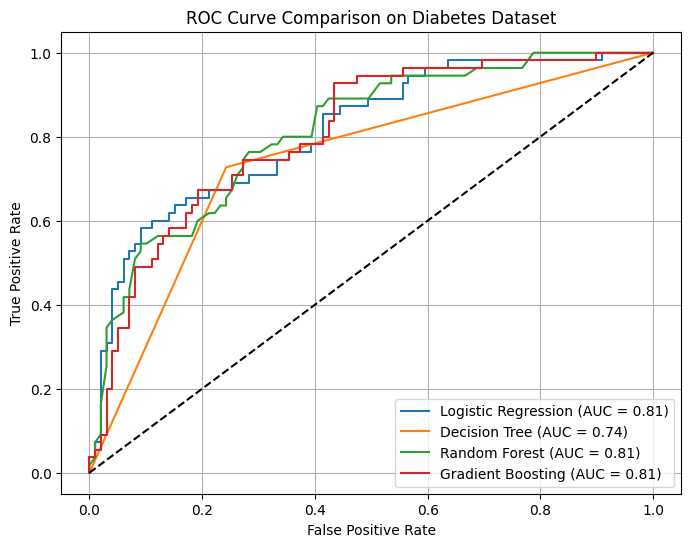

In [46]:
 # Plot settings
import matplotlib.pyplot as plt 
# Train and evaluate each model
plt.figure(figsize=(8, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Print report
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison on Diabetes Dataset")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()